#**PROBLEMA DE NEGOCIO**


---






La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("german_credit.csv")
df_banco.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [4]:
def procesar_datos():
  global df_banco, resultados
  # Eliminar registros duplicados y guardar en df_banco
  df_banco=df_banco.drop_duplicates()
  # Eliminar valores nulos
  df_banco = df_banco.dropna()
  #Creo un diccionario para sustituir los elementos de texto a valores numéricos
  #'account_check_status' 'estado_comprobación_cuenta'
  a = { '< 0 DM': 1,
        '0 <= ... < 200 DM': 2,
        '>= 200 DM / salary assignments for at least 1 year': 3,
        'no checking account': 4
      }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a).astype(int)

  #'credit_history'
  b = {'no credits taken/ all credits paid back duly': 1,
      'all credits at this bank paid back duly': 2,
      'existing credits paid back duly till now': 3,
      'delay in paying off in the past': 4,
      'critical account/ other credits existing (not at this bank)' : 5
       }
  df_banco['credit_history'] = df_banco['credit_history'].map(b).astype(int)

  #'purpose' 'objetivo'
  c = { 'car (new)': 1,
      'car (used)': 2,
      'furniture/equipment': 3,
      'radio/television': 4,
      'domestic appliances' : 5,
      'repairs': 6,
      'education': 7,
      '(vacation - does not exist?)': 8,
      'retraining': 9,
      'business' : 10,
        'others':11,
      }
  df_banco['purpose'] = df_banco['purpose'].map(c).astype(int)

  #savings 'Ahorros'
  d = { 'unknown/ no savings account': 1,
      '.. >= 1000 DM ': 2,
      '500 <= ... < 1000 DM ': 3,
      '100 <= ... < 500 DM': 4,
      '... < 100 DM' : 5,
      }

  df_banco['savings'] = df_banco['savings'].map(d).astype(int)

  #present_emp_since 'empleados presentes desde'
  e = { '.. >= 7 years': 1,
      '4 <= ... < 7 years': 2,
      '1 <= ... < 4 years': 3,
      '... < 1 year ': 4,
      'unemployed' : 5,
      }

  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(e).astype(int)

  #personal_status_sex
  f = { 'male : divorced/separated': 1,
      'female : divorced/separated/married': 2,
      'male : single': 3,
      'male : married/widowed': 4,
      'female : single' : 5,
      }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(f).astype(int)

  #other_debtors 'Otros deudores'
  g = { 'none': 1,
      'co-applicant': 2,
      'guarantor': 3,
      }

  df_banco['other_debtors'] = df_banco['other_debtors'].map(g).astype(int)

  #property 'propiedad'
  h = {'real estate': 1,
      'if not A121 : building society savings agreement/ life insurance': 2,
      'if not A121/A122 : car or other, not in attribute 6': 3,
      'unknown / no property': 4,
      }
  df_banco['property'] = df_banco['property'].map(h).astype(int)

  #other_installment_plans 'otros planes de instalación'
  i = { 'bank': 1,
      'stores': 2,
      'none': 3,
      }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(i).astype(int)

  #housing 'Alojamiento'
  j = { 'rent': 1,
      'own': 2,
      'for free': 3,
      }
  df_banco['housing'] = df_banco['housing'].map(j).astype(int)

  #job 'trabajo'
  k = { 'unemployed/ unskilled - non-resident': 1,
      'unskilled - resident': 2,
      'skilled employee / official': 3,
        'management/ self-employed/ highly qualified employee/ officer': 4,
      }
  df_banco['job'] = df_banco['job'].map(k).astype(int)

  #telephone
  l = { 'none': 0,
      'yes, registered under the customers name ': 1,
      }
  df_banco['telephone'] = df_banco['telephone'].map(l).astype(int)

  #foreign_worker
  m = { 'no': 0,
      'yes': 1,
      }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(m).astype(int)

In [5]:
procesar_datos()
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,1,6,5,5,1169,1,1,4,3,1,4,1,67,3,2,2,3,1,1,1
1,1,2,48,3,5,5951,5,3,2,2,1,2,1,22,3,2,1,3,1,0,1
2,0,4,12,5,8,2096,5,2,2,3,1,3,1,49,3,2,1,2,2,0,1
3,0,1,42,3,4,7882,5,2,2,3,3,4,2,45,3,3,1,3,2,0,1
4,1,1,24,4,1,4870,5,3,3,3,1,4,4,53,3,3,2,3,2,0,1


#**3. Exploración de Datos**


---


In [6]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

,personal_status_sex,age,duration_in_month,credit_amount,default
0,3,67,6,1169,0
1,2,22,48,5951,1
2,3,49,12,2096,0
3,3,45,42,7882,0
4,3,53,24,4870,1


In [7]:
#Tu función feature_engineering() y tu código aqui
def feature_engineering():
  global df_banco, resultados
  sexo = {1: 0, 2: 1, 3: 0, 4: 0, 5: 1}
  estado_civil={1: 0, 2: 0, 3: 1, 4: 0, 5: 1}
  df_banco['sexo']=df_banco['personal_status_sex'].map(sexo).astype(int)
  df_banco['estado_civil']=df_banco['personal_status_sex'].map(estado_civil).astype(int)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],bins=[1,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]).astype(int)
  df_banco=df_banco.drop(['personal_status_sex','age','duration_in_month','credit_amount'], axis=1)

In [8]:
feature_engineering()
df_banco.head()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6
2,0,4,5,8,5,2,2,1,3,1,3,2,1,2,2,0,1,0,1,3,1,3
3,0,1,3,4,5,2,2,3,4,2,3,3,1,3,2,0,1,0,1,3,4,8
4,1,1,4,1,5,3,3,1,4,4,3,3,2,3,2,0,1,0,1,4,2,5


In [9]:
#Tu función analisis_exploratorio() y tu código aqui
def analisis_exploratorio():
  global df_banco, resultados
  columnas=['default','account_check_status','credit_history','purpose','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance','telephone',
            'foreign_worker','sexo','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
  plt.figure(figsize=(10, 30))
  # Generar un gráfico por cada columna
  for i, columna in enumerate(columnas,1):
      plt.subplot(11, 2, i)
      sns.countplot(x=columna, data=df_banco)
      plt.xlabel(columna.capitalize())
      plt.ylabel('Total')
  plt.tight_layout()
  plt.show()

In [10]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   credit_history              1000 non-null   int64
 3   purpose                     1000 non-null   int64
 4   savings                     1000 non-null   int64
 5   present_emp_since           1000 non-null   int64
 6   installment_as_income_perc  1000 non-null   int64
 7   other_debtors               1000 non-null   int64
 8   present_res_since           1000 non-null   int64
 9   property                    1000 non-null   int64
 10  other_installment_plans     1000 non-null   int64
 11  housing                     1000 non-null   int64
 12  credits_this_bank           1000 non-null   int64
 13  job                         1000 non-null   int64
 14  people_un

In [11]:
#Balanceando los datos
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

def balanceo_de_datos():
  global df_banco, resultados
  #dividiendo los datos en características y target
  X = df_banco.drop('default', axis = 1)
  y = df_banco['default']
  smt = SMOTE(random_state=123)
  X, y = smt.fit_resample(X, y)
  #unión de los datos balanceados
  df_banco = pd.concat([X, y], axis=1)

In [12]:
balanceo_de_datos()

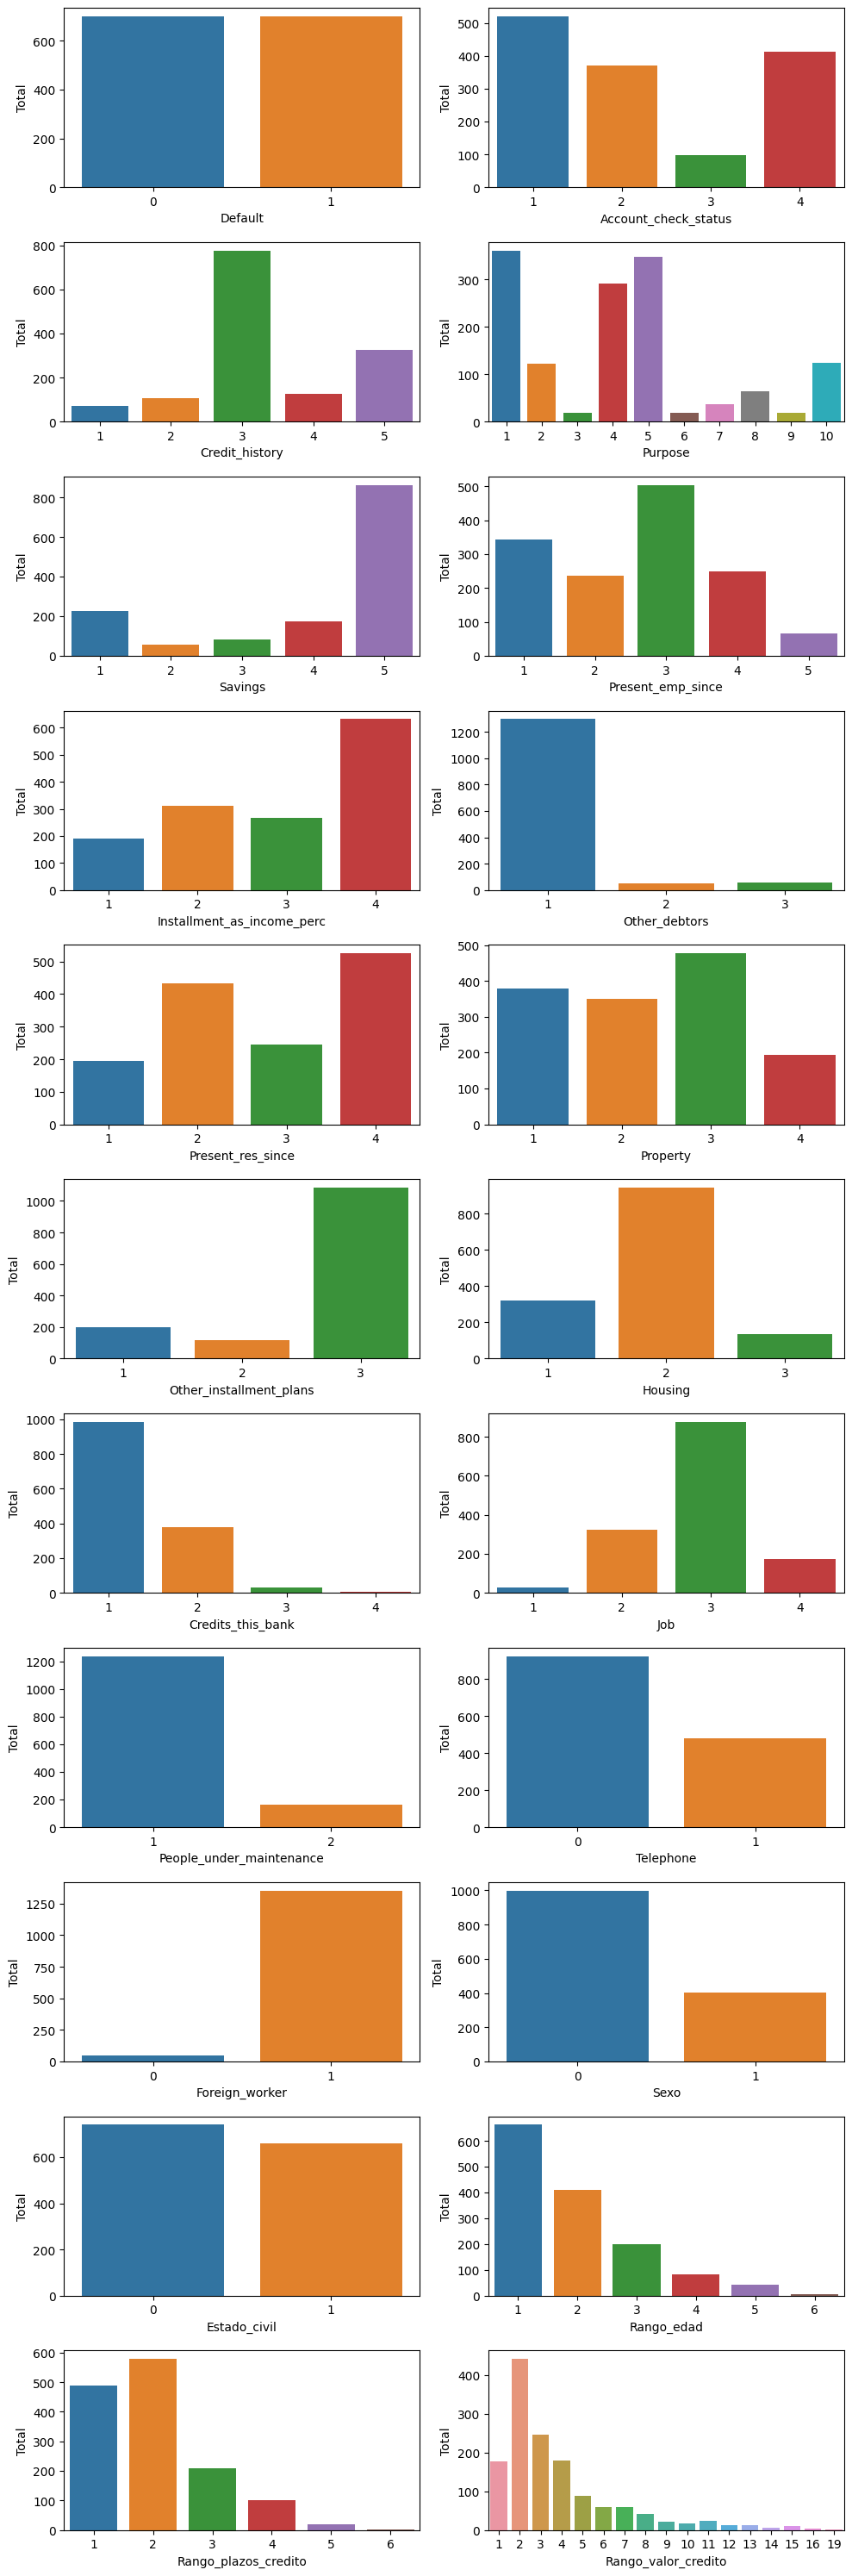

In [13]:
analisis_exploratorio()

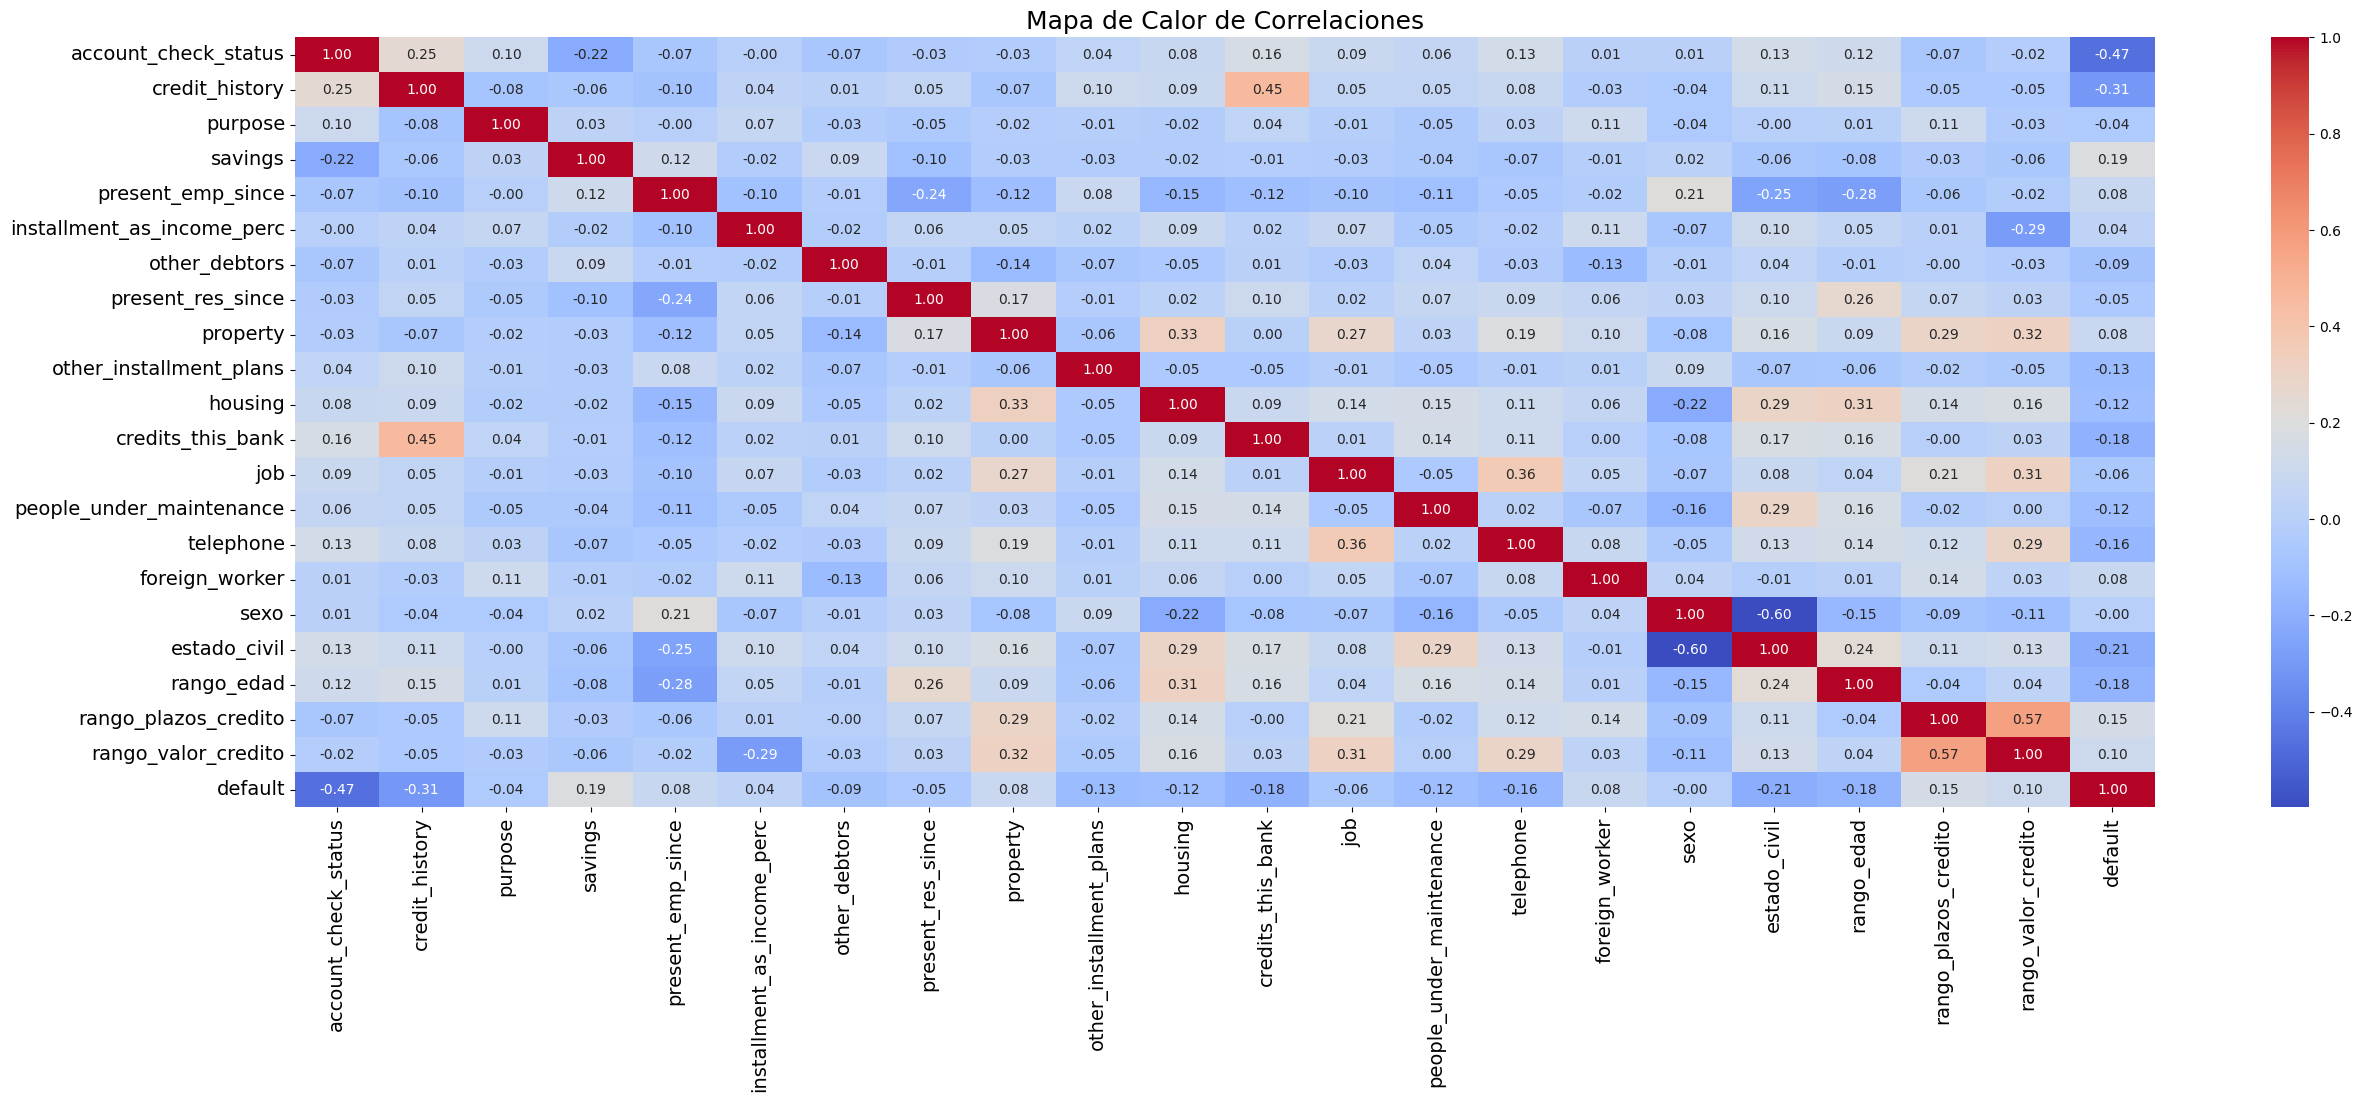

In [14]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [15]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       339
              1       401
1             0       660
dtype: int64


In [16]:
#Eliminamos la columna sexo del dataFrame
df_banco.drop(['sexo'], axis=1, inplace=True)

In [17]:
df_banco.drop(['telephone'], axis=1, inplace=True)

In [18]:
df_banco.drop(['purpose'], axis=1, inplace=True)

In [19]:
df_banco[df_banco['rango_plazos_credito']==6]

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,foreign_worker,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,default
677,2,3,4,3,2,1,2,3,3,2,1,3,1,1,0,1,6,6,1


In [20]:
df_banco[df_banco['rango_edad']==6]

,account_check_status,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,foreign_worker,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,default
186,2,2,5,1,2,1,4,4,1,3,1,4,2,1,0,6,1,6,1
330,1,5,5,5,2,1,4,4,3,3,2,4,1,1,1,6,2,7,0
430,4,3,5,2,1,1,4,1,3,2,1,2,1,1,1,6,1,4,0
536,1,3,1,5,4,1,3,2,3,2,1,4,1,1,0,6,1,2,0
606,4,5,5,3,3,1,2,1,3,2,1,4,1,1,1,6,2,5,0
756,3,5,5,3,1,1,1,1,3,2,3,1,2,0,1,6,1,2,0


In [21]:
# Eliminar todas las filas donde 'rango_edad' es igual a 6
df_banco = df_banco[(df_banco['rango_edad'] != 6)].reset_index(drop=True)
df_banco = df_banco[(df_banco['rango_plazos_credito'] != 6)].reset_index(drop=True)

In [22]:
#Tu función analisis_exploratorio() y tu código aqui
def analisis_exploratorio2():
  global df_banco, resultados
  columnas=['account_check_status','credit_history','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance',
            'foreign_worker','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
  plt.figure(figsize=(10, 30))
  # Generar un gráfico por cada columna
  for i, columna in enumerate(columnas,1):
      plt.subplot(11, 2, i)
      sns.countplot(x=columna, data=df_banco)
      plt.xlabel(columna.capitalize())
      plt.ylabel('Total')
  plt.tight_layout()
  plt.show()

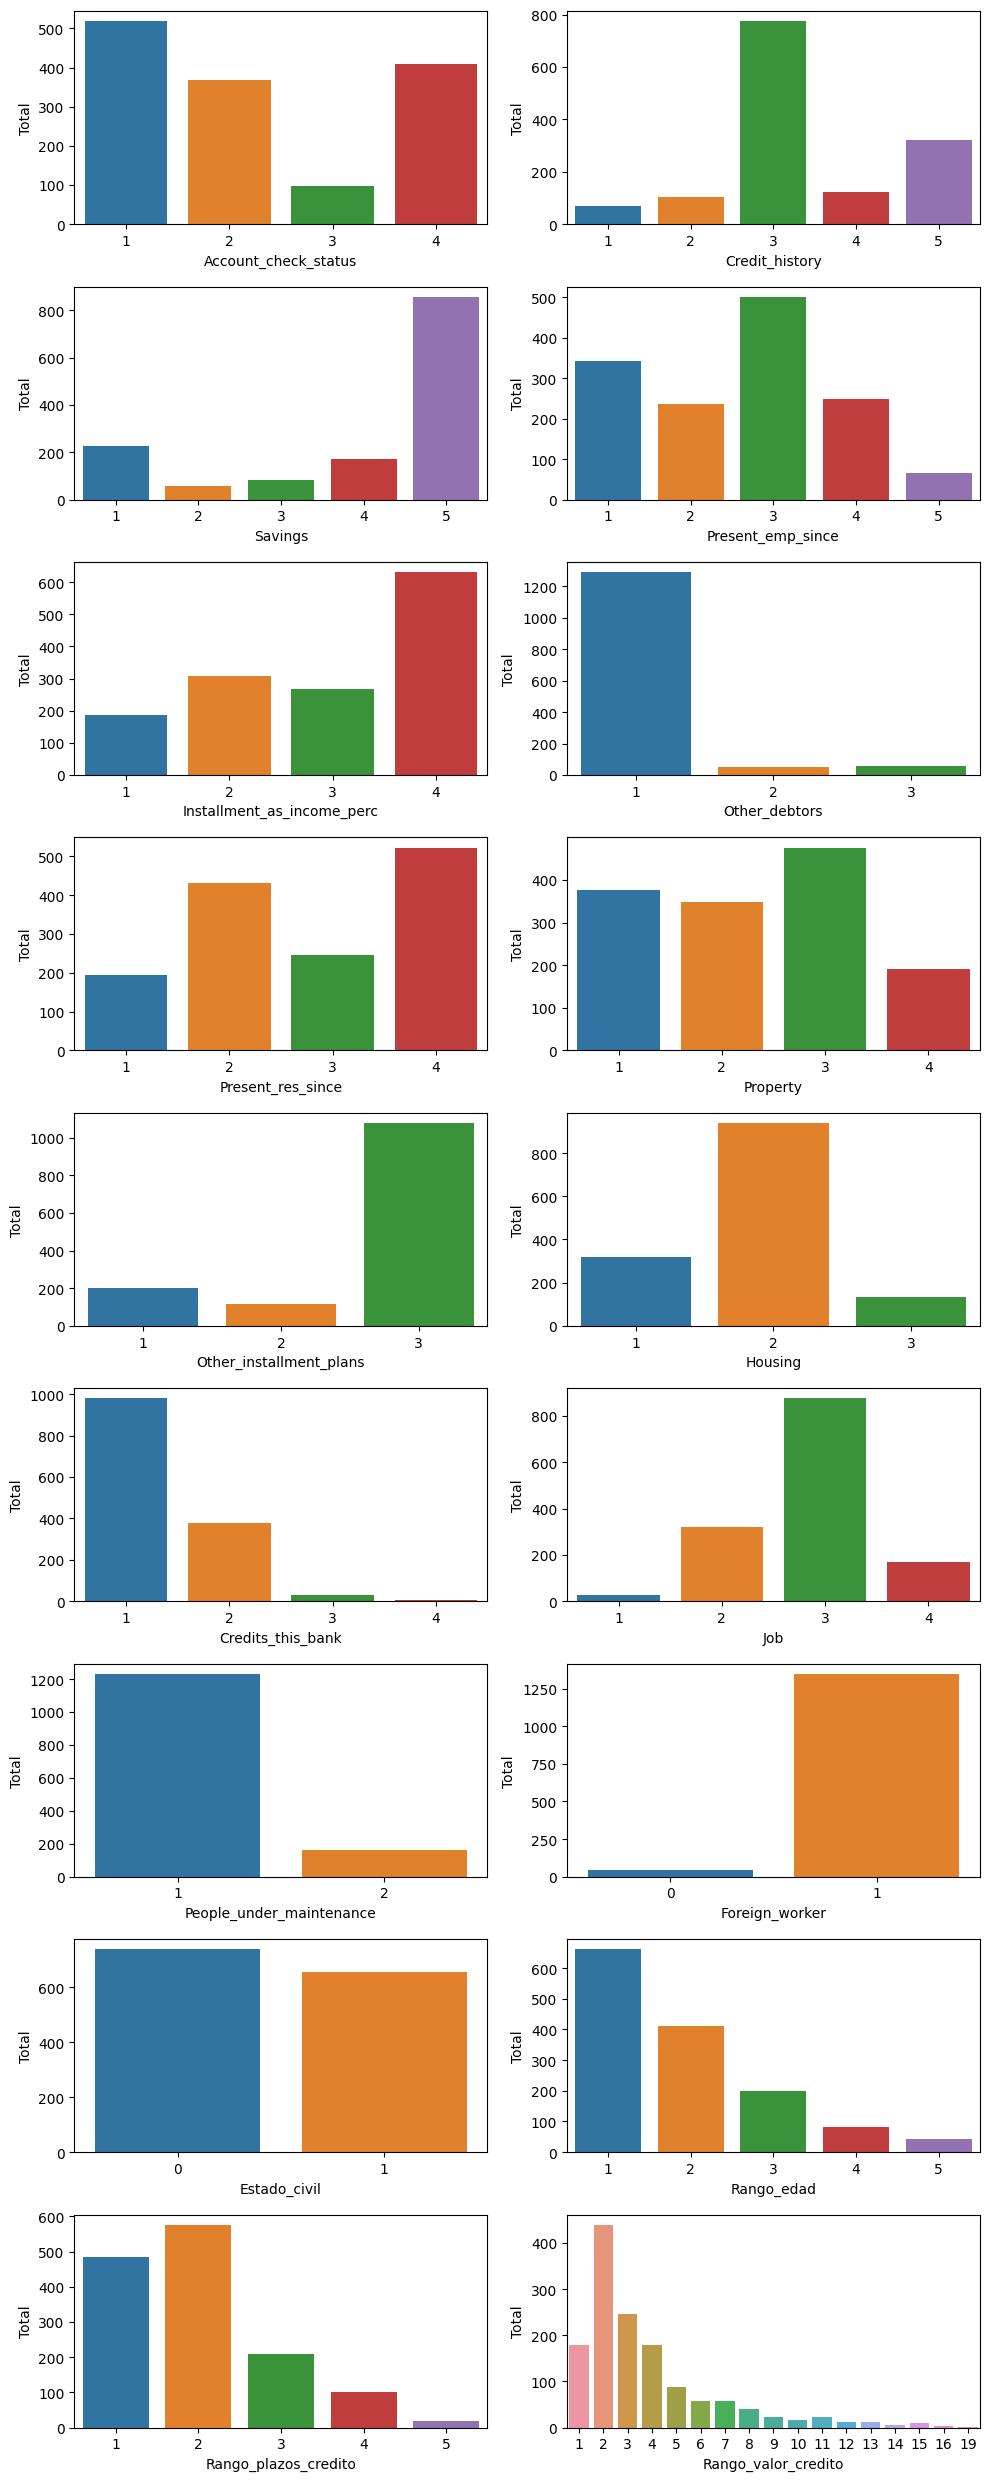

In [23]:
analisis_exploratorio2()

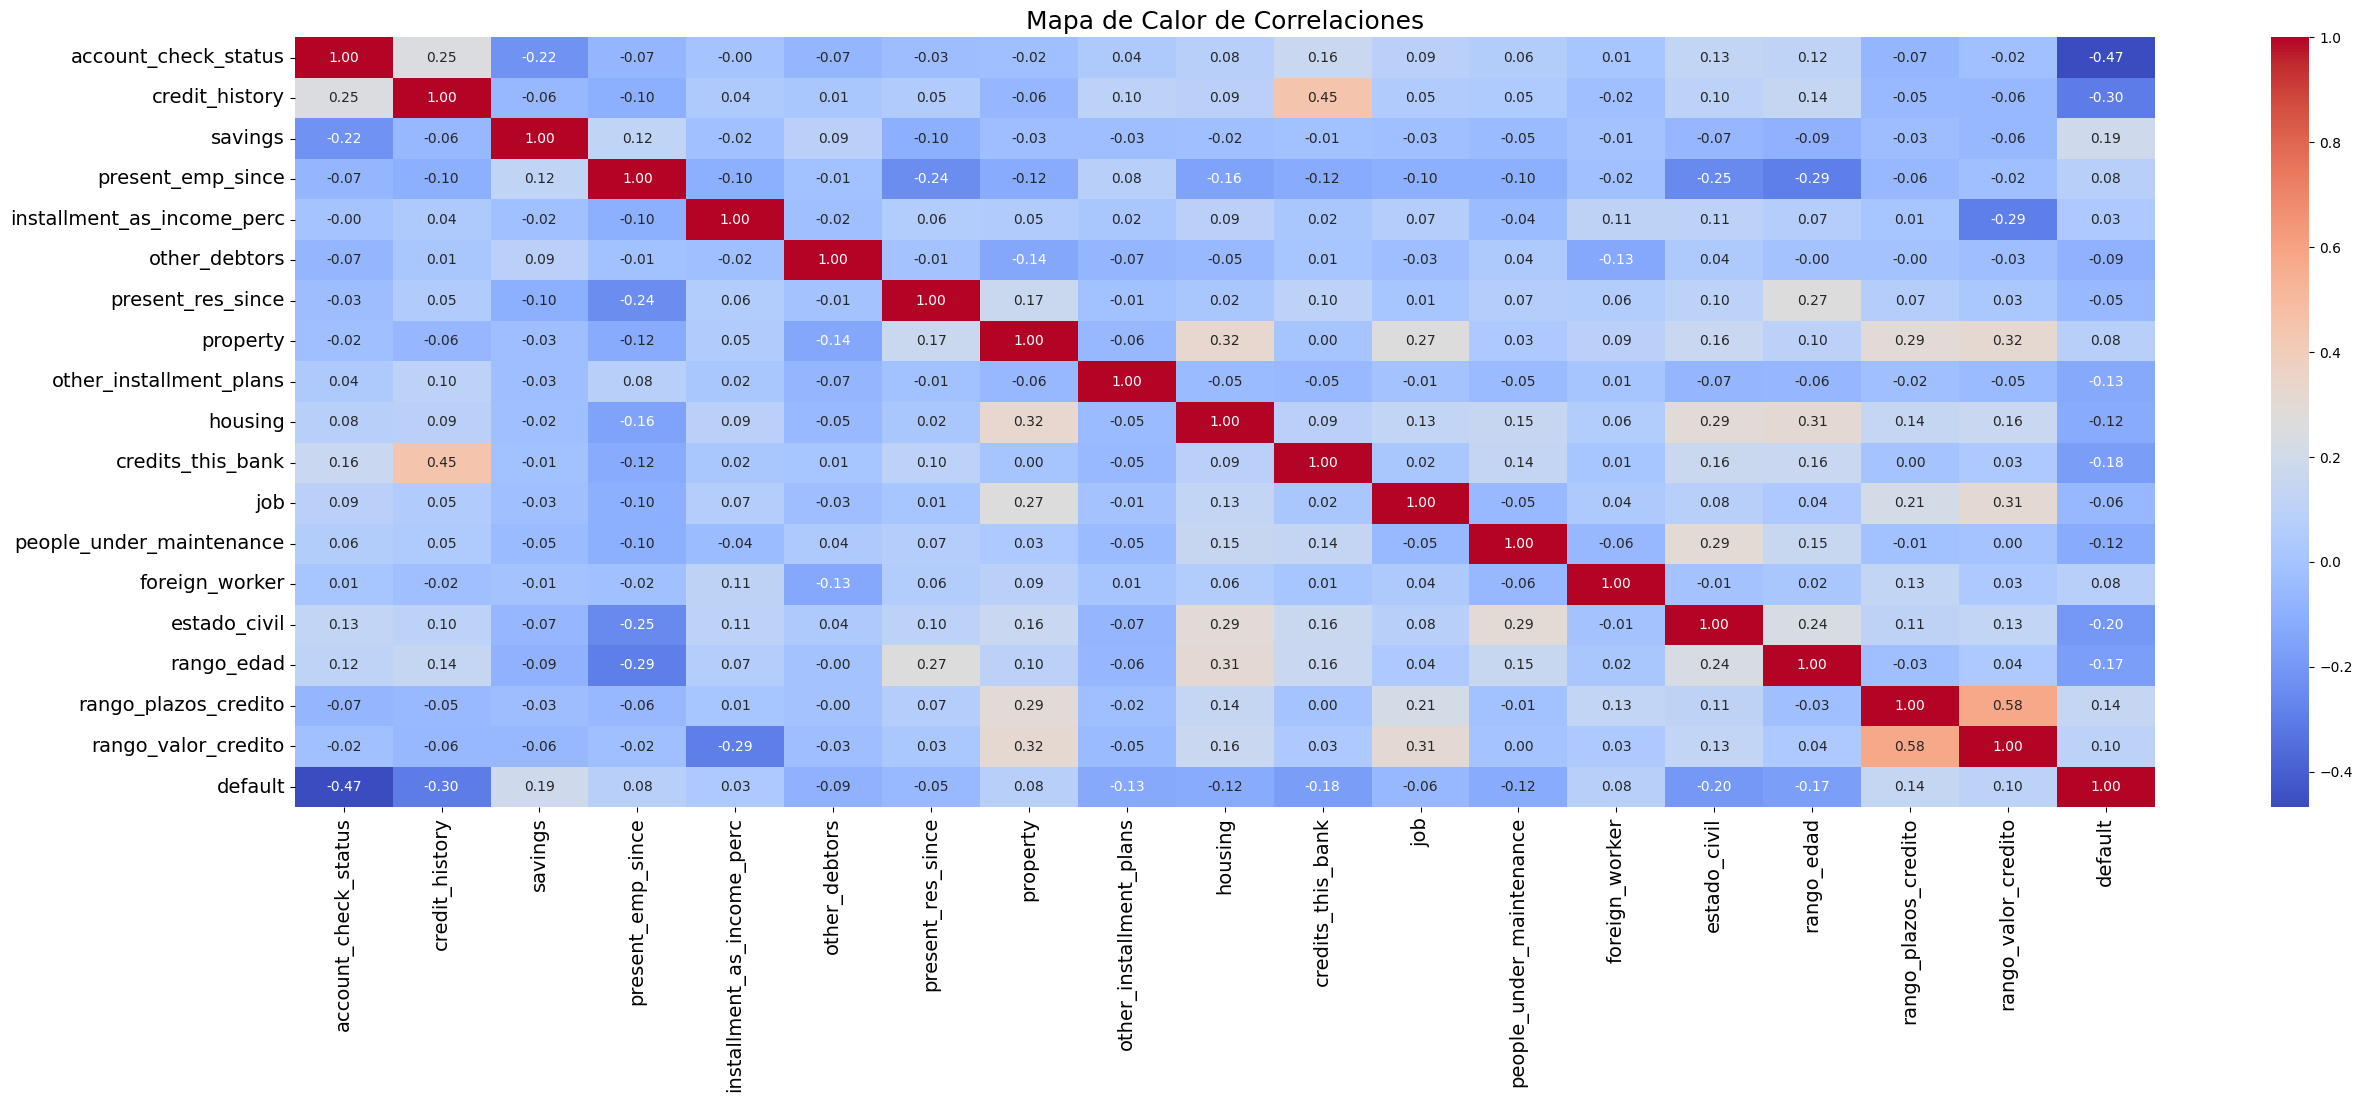

In [24]:
plt.figure(figsize=(30, 10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

#**4. Construcción de Modelos**


---


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

In [26]:
#Tu función crea_modelos() y tu código aqui
global df_banco, resultados
y = df_banco['default']
x = df_banco.drop(columns=['default'])
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)
#creamos listas vacías por cada metrica que vamos a utilizar
nombre_modelo = ['Regreción Logistica','Árbol de Desición','Random Forest','Naive Bayes']
accuracy = []
precision = []
recall = []
f1_Score = []
auc_roc=[]

#Regreción Logistica
model_lg = LogisticRegression()
model_lg.fit(train_x, train_y)
predictions = model_lg.predict(test_x)
#Metricas de evalución
accuracy_lr = accuracy_score(test_y, predictions)
precision_lr = precision_score(test_y, predictions)
recall_lr = recall_score(test_y, predictions)
f1_score_lr = f1_score(test_y, predictions)
auc_roc_lr = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_lr)
precision.append(precision_lr)
recall.append(recall_lr)
f1_Score.append(f1_score_lr)
auc_roc.append(auc_roc_lr)

#Arbol de desición
model_AD = DecisionTreeClassifier()
model_AD.fit(train_x, train_y)
predictions = model_AD.predict(test_x)
  #Metricas de evalución
accuracy_arbol_desicion = accuracy_score(test_y, predictions)
precision_arbol_desicion = precision_score(test_y, predictions)
recall_arbol_desicion = recall_score(test_y, predictions)
f1_score_arbol_desicion = f1_score(test_y, predictions)
auc_roc_arbol_desicion = roc_auc_score(test_y, predictions)
#Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_arbol_desicion)
precision.append(precision_arbol_desicion)
recall.append(recall_arbol_desicion)
f1_Score.append(f1_score_arbol_desicion)
auc_roc.append(auc_roc_arbol_desicion)

  #Arboles de Desicion- Random Forest
model_RF = RandomForestClassifier()
model_RF.fit(train_x, train_y)
predictions = model_RF.predict(test_x)
  #Metricas de evalución
accuracy_random_forest = accuracy_score(test_y, predictions)
precision_random_forest = precision_score(test_y, predictions)
recall_random_forest = recall_score(test_y, predictions)
f1_score_random_forest = f1_score(test_y, predictions)
auc_roc_random_forest = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_random_forest)
precision.append(precision_random_forest)
recall.append(recall_random_forest)
f1_Score.append(f1_score_random_forest)
auc_roc.append(auc_roc_random_forest)

    #Naive Bayes
model_NB = GaussianNB()
model_NB.fit(train_x, train_y)
predictions = model_NB.predict(test_x)
  #Metricas de evalución
accuracy_naive_bayes = accuracy_score(test_y, predictions)
precision_naive_bayes = precision_score(test_y, predictions)
recall_naive_bayes = recall_score(test_y, predictions)
f1_score_naive_bayes = f1_score(test_y, predictions)
auc_roc_naive_bayes = roc_auc_score(test_y, predictions)
  #Agregamos el valor de cada metrica a nuestra lista
accuracy.append(accuracy_naive_bayes)
precision.append(precision_naive_bayes)
recall.append(recall_naive_bayes)
f1_Score.append(f1_score_naive_bayes)
auc_roc.append(auc_roc_naive_bayes)
  #Lo guardamos en un diccionario
resultados = {
    'Nombre_Modelo': nombre_modelo,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1_Score': f1_Score,
    'AUC_ROC': auc_roc
}


In [27]:

df_resultados = pd.DataFrame(columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'])
for i, model in enumerate(resultados['Nombre_Modelo']):
    df_resultados = df_resultados.append({
        'Modelo': model,
        'Accuracy': resultados['Accuracy'][i],
        'Precision': resultados['Precision'][i],
        'Recall': resultados['Recall'][i],
        'F1-score': resultados['F1_Score'][i],
        'AUC-ROC': resultados['AUC_ROC'][i]
    }, ignore_index=True)
df_resultados.style.background_gradient(cmap='YlOrRd')

,Modelo,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Regreción Logistica,0.755981,0.751131,0.779343,0.764977,0.755525
1,Árbol de Desición,0.712919,0.703057,0.755869,0.728507,0.712081
2,Random Forest,0.796651,0.771186,0.854460,0.810690,0.795523
3,Naive Bayes,0.712919,0.688259,0.798122,0.739130,0.711256


#**5. Evaluación y Selección del Modelo**


---


In [28]:
def visualiza_resultados():
  global df_banco, resultados
  results_df = pd.DataFrame(resultados)
  results_df.set_index('Nombre_Modelo', inplace=True)
  #Gráfico
  results_df = results_df.T
  colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']
  results_df.plot(kind='bar', figsize=(15, 11), colormap='viridis', rot=0, color=colors)
  plt.title('Comparación de Métricas por Modelo')
  plt.xlabel('Métricas')
  plt.ylabel('Puntuación')
  plt.legend(title='Modelos')
  plt.tight_layout()
  plt.show()

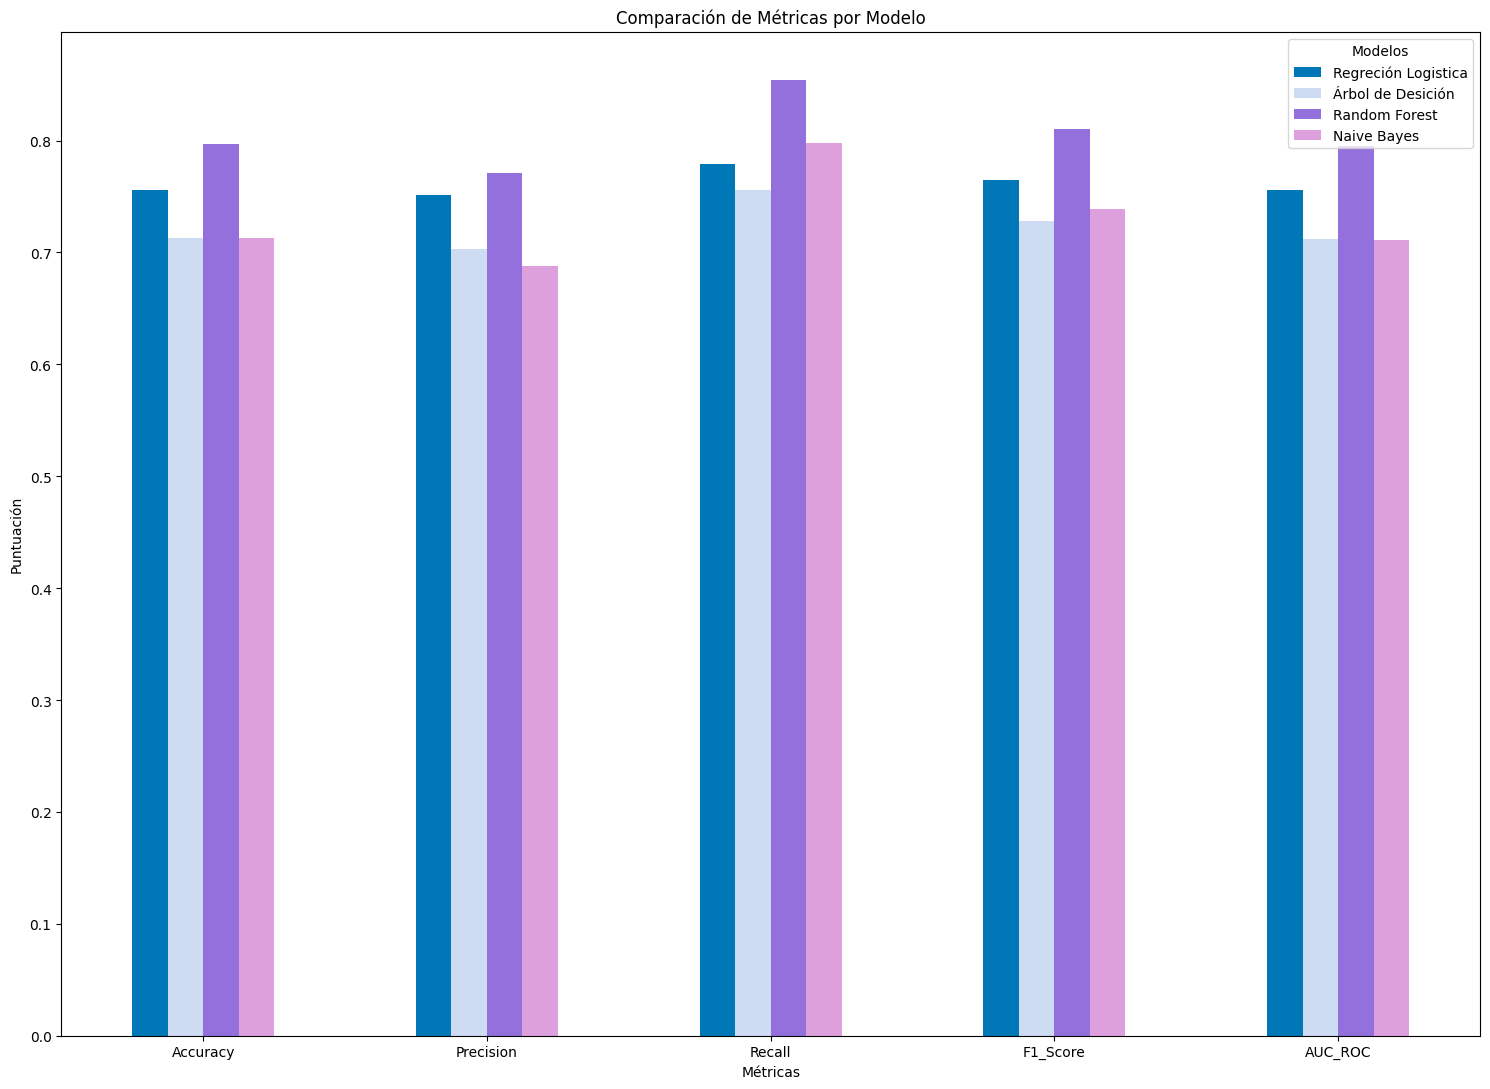

In [29]:
visualiza_resultados()

#**6. Optimización del Modelo Random Forest con Random Search Validation**

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [96]:
# Definir el modelo y la cuadrícula de hiperparámetros
param_dist = {
    'n_estimators': [150, 200, 250],
    'max_depth': [20, 25, 30, 40],
}

## 6.1.-PRECISIÓN

In [100]:
# Realizar la búsqueda de cuadrícula
random_search = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='precision',
                                   random_state=42)
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='precision')

In [101]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.110177,0.528020,0.087777,0.049877,150,20,"{'n_estimators': 150, 'max_depth': 20}",0.822917,0.759615,0.781250,0.816327,0.772277,0.790477,0.024857,9
1,0.486295,0.168629,0.019268,0.000962,200,20,"{'n_estimators': 200, 'max_depth': 20}",0.814433,0.740385,0.791667,0.836735,0.766990,0.790042,0.033985,10
2,0.502589,0.010462,0.023229,0.001183,250,20,"{'n_estimators': 250, 'max_depth': 20}",0.830000,0.769231,0.781250,0.820000,0.754902,0.791077,0.029100,7
3,0.299021,0.007543,0.016124,0.002464,150,25,"{'n_estimators': 150, 'max_depth': 25}",0.822917,0.750000,0.770833,0.835052,0.757282,0.787217,0.034964,12
4,0.645239,0.138572,0.031743,0.008027,200,25,"{'n_estimators': 200, 'max_depth': 25}",0.826531,0.774510,0.775510,0.821782,0.784314,0.796529,0.022863,2
5,0.747963,0.072039,0.031410,0.004771,250,25,"{'n_estimators': 250, 'max_depth': 25}",0.833333,0.759615,0.775510,0.825243,0.764706,0.791682,0.031237,6
6,0.301888,0.004737,0.015337,0.000454,150,30,"{'n_estimators': 150, 'max_depth': 30}",0.842105,0.769231,0.785714,0.824742,0.780000,0.800359,0.028054,1
7,0.400700,0.007105,0.018865,0.000486,200,30,"{'n_estimators': 200, 'max_depth': 30}",0.831579,0.759615,0.765306,0.830000,0.766990,0.790698,0.032829,8
8,0.501403,0.006831,0.022310,0.000132,250,30,"{'n_estimators': 250, 'max_depth': 30}",0.826531,0.774510,0.767677,0.840000,0.767677,0.795279,0.031406,3
9,0.299539,0.005979,0.016275,0.002026,150,40,"{'n_estimators': 150, 'max_depth': 40}",0.821053,0.774510,0.783505,0.833333,0.762376,0.794955,0.027439,4


In [102]:
# Obtener los mejores hiperparámetros
best_params = random_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Mejores hiperparámetros: {'n_estimators': 150, 'max_depth': 30}


In [103]:
#Arboles de Desicion- Random Forest
model_RF_best = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    random_state=42
)
model_RF_best.fit(train_x, train_y)
predictions = model_RF_best.predict(test_x)
#Metricas de evalución
precision_random_forest_best = precision_score(test_y, predictions)
print(precision_random_forest_best)

0.7838983050847458


## 6.2.-Recall

In [111]:
# Realizar la búsqueda de cuadrícula
random_search2 = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='recall',
                                   random_state=123)
random_search2.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=123, scoring='recall')

In [112]:
pd.DataFrame(random_search2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.686302,0.114248,0.040372,0.019592,150,20,"{'n_estimators': 150, 'max_depth': 20}",0.804124,0.793814,0.762887,0.855670,0.783505,0.800000,0.030996,12
1,0.475347,0.148156,0.019592,0.000906,200,20,"{'n_estimators': 200, 'max_depth': 20}",0.804124,0.814433,0.793814,0.845361,0.814433,0.814433,0.017251,8
2,0.546910,0.083959,0.026069,0.006429,250,20,"{'n_estimators': 250, 'max_depth': 20}",0.824742,0.824742,0.783505,0.865979,0.793814,0.818557,0.028866,4
3,0.308354,0.005741,0.017390,0.001825,150,25,"{'n_estimators': 150, 'max_depth': 25}",0.824742,0.824742,0.783505,0.865979,0.783505,0.816495,0.030859,6
4,0.411930,0.027487,0.020676,0.002974,200,25,"{'n_estimators': 200, 'max_depth': 25}",0.835052,0.814433,0.783505,0.855670,0.783505,0.814433,0.028421,8
5,0.729415,0.096620,0.032514,0.005327,250,25,"{'n_estimators': 250, 'max_depth': 25}",0.814433,0.835052,0.793814,0.855670,0.793814,0.818557,0.024045,4
6,0.298759,0.006415,0.015009,0.000152,150,30,"{'n_estimators': 150, 'max_depth': 30}",0.824742,0.793814,0.762887,0.845361,0.793814,0.804124,0.028421,11
7,0.402669,0.004132,0.019333,0.000481,200,30,"{'n_estimators': 200, 'max_depth': 30}",0.824742,0.824742,0.773196,0.855670,0.793814,0.814433,0.028421,8
8,0.501551,0.012109,0.026611,0.002882,250,30,"{'n_estimators': 250, 'max_depth': 30}",0.835052,0.824742,0.773196,0.876289,0.804124,0.822680,0.034130,1
9,0.302774,0.006870,0.015265,0.000481,150,40,"{'n_estimators': 150, 'max_depth': 40}",0.845361,0.814433,0.783505,0.865979,0.793814,0.820619,0.030996,3


In [113]:
# Obtener los mejores hiperparámetros
best_params2 = random_search2.best_params_
print(f"Mejores hiperparámetros: {best_params2}")

Mejores hiperparámetros: {'n_estimators': 250, 'max_depth': 30}


In [114]:
#Arboles de Desicion- Random Forest
model_RF_best2 = RandomForestClassifier(
    n_estimators=250,
    max_depth=30,
    random_state=42
)
model_RF_best2.fit(train_x, train_y)
predictions = model_RF_best2.predict(test_x)
#Metricas de evalución
recall_random_forest_best = recall_score(test_y, predictions)
print(recall_random_forest_best )

0.8685446009389671


## 6.2.- F1

In [115]:
# Realizar la búsqueda de cuadrícula
random_search3 = RandomizedSearchCV(model_RF,
                                   param_dist,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=42)
random_search3.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [20, 25, 30, 40],
                                        'n_estimators': [150, 200, 250]},
                   random_state=42, scoring='f1')

In [116]:
pd.DataFrame(random_search3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.388092,0.100049,0.018151,0.004994,150,20,"{'n_estimators': 150, 'max_depth': 20}",0.824742,0.782178,0.804124,0.841026,0.771574,0.804729,0.025792,6
1,0.410889,0.005440,0.020135,0.001138,200,20,"{'n_estimators': 200, 'max_depth': 20}",0.835052,0.794118,0.777202,0.845771,0.787879,0.808004,0.027220,1
2,0.497650,0.009459,0.022891,0.000700,250,20,"{'n_estimators': 250, 'max_depth': 20}",0.845361,0.787879,0.779487,0.841026,0.779487,0.806648,0.030027,3
3,0.319869,0.026199,0.016771,0.003471,150,25,"{'n_estimators': 150, 'max_depth': 25}",0.818653,0.780000,0.777778,0.848485,0.787879,0.802559,0.027228,9
4,1.268572,0.556090,0.059993,0.027319,200,25,"{'n_estimators': 200, 'max_depth': 25}",0.824742,0.800000,0.773196,0.838384,0.781726,0.803610,0.024790,8
5,0.500849,0.007827,0.023637,0.001778,250,25,"{'n_estimators': 250, 'max_depth': 25}",0.820513,0.798030,0.774869,0.855670,0.787879,0.807392,0.028387,2
6,0.302722,0.004280,0.015437,0.000546,150,30,"{'n_estimators': 150, 'max_depth': 30}",0.824742,0.798030,0.762887,0.834171,0.791878,0.802341,0.025297,10
7,0.400615,0.008688,0.018980,0.000622,200,30,"{'n_estimators': 200, 'max_depth': 30}",0.835052,0.780000,0.777202,0.841026,0.785714,0.803799,0.028155,7
8,0.625672,0.133951,0.030482,0.003504,250,30,"{'n_estimators': 250, 'max_depth': 30}",0.822917,0.796020,0.769231,0.838384,0.777778,0.800866,0.026272,11
9,0.417594,0.064455,0.021424,0.006007,150,40,"{'n_estimators': 150, 'max_depth': 40}",0.836735,0.800000,0.769231,0.846939,0.773869,0.805355,0.031745,5


In [117]:
# Obtener los mejores hiperparámetros
best_params3 = random_search3.best_params_
print(f"Mejores hiperparámetros: {best_params3}")

Mejores hiperparámetros: {'n_estimators': 200, 'max_depth': 20}


In [118]:
#Arboles de Desicion- Random Forest
model_RF_best3 = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42
)
model_RF_best3.fit(train_x, train_y)
predictions = model_RF_best3.predict(test_x)
#Metricas de evalución
f1_random_forest_best = f1_score(test_y, predictions)
print(f1_random_forest_best )

0.8285077951002228
